# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observable Trends

* Cities closer to the equater as seen in figure 1 have the higher temperature.

* For both southern and northern hemisphere there is an increase correlation between latitude and temperature cities temperature are higher when they are closer to the   equator(R-square are 0.45 and 0.65 respectively). 
* No correlation between latitude and the other parameters (cloudiness, wind speed, and humidity) were found.

In [71]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from api_keys import weather_api_key
import scipy.stats as st
import numpy as np
from citipy import citipy
import time


## Generate Cities List

In [13]:
Coordinates = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000000, high=90.000000, size=1500)
lngs = np.random.uniform(low=-180.000000, high=180.000000, size=1500)
Coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for Coord in Coordinates:
    city = citipy.nearest_city(Coord[0], Coord[1]).city_name
    country = citipy.nearest_city(Coord[0], Coord[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm count


# set up lists to hold reponse info
# Loop through the list of cities and perform a request for data on each


In [14]:
# create a empty dataframe

cities_gen = pd.DataFrame({"City": cities, "Country": countries})

cities_gen["Lat"]= "" 
cities_gen["Lng"] = ""                          
cities_gen["Max Temp"] = "" 
cities_gen["Cloudiness"] = ""
cities_gen["Humidity"] = ""
cities_gen["Windspeed"] = ""
cities_gen["Date"] = ""

cities_gen.head()

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,atuona,pf,,,,,,,
1,illoqqortoormiut,gl,,,,,,,
2,grindavik,is,,,,,,,
3,mar del plata,ar,,,,,,,
4,flin flon,ca,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

In [16]:
#tracking the response number as my API key was temporary blocked due to the continual sufficient exceeding of the calls per minute limit 

index_count = 0
counter = 1

for index, row in cities_gen.iterrows(): 
    #Create the query url for the API call
    city_name = row['City']
    
    #print(f"Retrieving Results for Index {index} | {city_name}")
    query_url = url + city_name + "&APPID=" + weather_api_key
    
    #print(f"Processing Record {index + 1} | {City}")
   
    #API call
    
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found
    try: 
        #print(f'Weather Data for Record {number} of Set {the_set} 
        #Input data into the dataframe
        
        cities_gen.loc[index, 'Lat'] = response['coord']['lat']
        cities_gen.loc[index, 'Lng'] = response['coord']['lon']
        cities_gen.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_gen.loc[index, 'Cloudiness'] = response['clouds']['all']
     
        cities_gen.loc[index, 'Humidity'] = response['main']['humidity']
        cities_gen.loc[index, 'Windspeed'] = response['wind']['speed']
        cities_gen.loc[index, 'Date'] = response['dt']
        
        if index_count > 55:
            index_count = 0
            counter = counter + 1
    
        else:
            index_count = index_count + 1
            
        print(f"Processing {index_count} of Set {counter} : {city_name}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        time.sleep(10) 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
               


Processing 1 of Set 1 : atuona
City not found. Skipping...
Processing 2 of Set 1 : grindavik
Processing 3 of Set 1 : mar del plata
Processing 4 of Set 1 : flin flon
Processing 5 of Set 1 : vilhena
Processing 6 of Set 1 : rikitea
Processing 7 of Set 1 : punta arenas
Processing 8 of Set 1 : bridlington
Processing 9 of Set 1 : kaitangata
Processing 10 of Set 1 : tiarei
Processing 11 of Set 1 : provideniya
Processing 12 of Set 1 : palmer
Processing 13 of Set 1 : albany
Processing 14 of Set 1 : laguna
Processing 15 of Set 1 : meadow lake
Processing 16 of Set 1 : thompson
Processing 17 of Set 1 : mataura
Processing 18 of Set 1 : fortuna
Processing 19 of Set 1 : portland
Processing 20 of Set 1 : bluff
Processing 21 of Set 1 : vaini
Processing 22 of Set 1 : mareeba
Processing 23 of Set 1 : butaritari
Processing 24 of Set 1 : carnarvon
Processing 25 of Set 1 : yellowknife
Processing 26 of Set 1 : esperance
Processing 27 of Set 1 : faanui
Processing 28 of Set 1 : qaanaaq
Processing 29 of Set 1 :

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:



cities_gen.head()

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,atuona,pf,-9.8,-139.03,78.33,1,76,17.52,1600225372
1,illoqqortoormiut,gl,,,,,,,
2,grindavik,is,63.84,-22.43,46.4,90,87,14.99,1600225382
3,mar del plata,ar,-38,-57.56,51.01,13,70,3.36,1600225224
4,flin flon,ca,54.77,-101.86,37.83,60,76,16.46,1600225383


In [20]:
cities_gen.head(50)

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,atuona,pf,-9.8,-139.03,78.33,1,76,17.52,1600225372
1,illoqqortoormiut,gl,,,,,,,
2,grindavik,is,63.84,-22.43,46.4,90,87,14.99,1600225382
3,mar del plata,ar,-38,-57.56,51.01,13,70,3.36,1600225224
4,flin flon,ca,54.77,-101.86,37.83,60,76,16.46,1600225383
5,vilhena,br,-12.74,-60.15,74.14,0,29,2.48,1600225383
6,rikitea,pf,-23.12,-134.97,74.07,0,71,0.4,1600225383
7,punta arenas,cl,-53.15,-70.92,32,0,85,8.05,1600225383
8,bridlington,gb,54.08,-0.19,61,92,100,2.24,1600225383
9,kaitangata,nz,-46.28,169.85,52,90,69,17,1600225383


In [41]:
#cleaning data from empty rows
newcities_gen = cities_gen.replace('', np.nan)
cities_data = newcities_gen.dropna()
cities_data

,City,Country,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed,Date
0,atuona,pf,-9.80,-139.03,78.33,1.0,76.0,17.52,1.600225e+09
2,grindavik,is,63.84,-22.43,46.40,90.0,87.0,14.99,1.600225e+09
3,mar del plata,ar,-38.00,-57.56,51.01,13.0,70.0,3.36,1.600225e+09
4,flin flon,ca,54.77,-101.86,37.83,60.0,76.0,16.46,1.600225e+09
5,vilhena,br,-12.74,-60.15,74.14,0.0,29.0,2.48,1.600225e+09
...,...,...,...,...,...,...,...,...,...
608,conde,br,-7.26,-34.91,73.40,20.0,94.0,5.82,1.600226e+09
611,lakki marwat,pk,32.61,70.91,92.32,0.0,28.0,5.37,1.600226e+09
612,suntar,ru,62.14,117.63,58.50,78.0,59.0,0.40,1.600226e+09
613,zeya,ru,53.75,127.27,67.42,100.0,57.0,1.79,1.600226e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [111]:
cities_data.to_csv("output_data/weather_citydata.csv", index = False)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
count = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].count()
mean = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].mean()
std= cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].std()
med = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].median()
vari = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].var()
mini= cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].min()
quartiles = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].quantile([.25,.5,.75])
q1 = quartiles.loc[0.25]
q2 =quartiles.loc[0.50]
q3 =quartiles.loc[0.75]
maxi = cities_data[['Lat', 'Lng', 'Max Temp', 'Cloudiness', 'Humidity','Windspeed']].max()

city_weather_stat = pd.DataFrame({"Count":count,"mean":mean, "Std": std,"Median": med, "Variance": vari, "Min": min, '25%': q1, '50%': q2, '75%': q3, 'Max': maxi})
city_weather_stat = city_weather_stat.transpose()
city_weather_stat

,Lat,Lng,Max Temp,Cloudiness,Humidity,Windspeed
Count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,19.873007,18.559633,65.230262,55.377622,72.900350,7.770734
Std,33.885207,90.477655,15.076691,38.868462,19.292627,5.450159
Median,21.450000,23.300000,66.990000,69.000000,77.000000,6.550000
Variance,1148.207269,8186.206102,227.306626,1510.757327,372.205464,29.704237
Min,-54.800000,-175.200000,19.260000,0.000000,9.000000,0.400000
25%,-8.950000,-58.627500,53.582500,19.000000,62.000000,3.415000
50%,21.450000,23.300000,66.990000,69.000000,77.000000,6.550000
75%,50.680000,95.485000,77.372500,94.000000,88.000000,10.707500
Max,78.220000,179.320000,97.920000,100.000000,100.000000,38.030000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

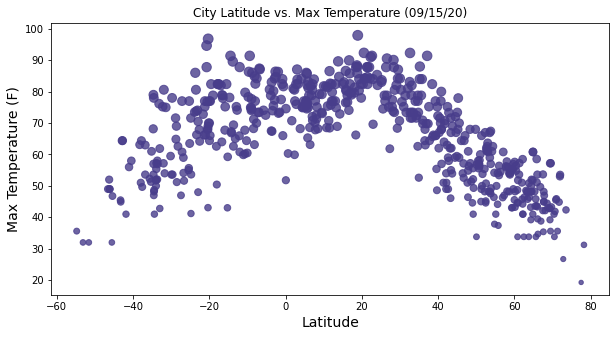

In [68]:
x_values = cities_data['Lat']
y_values = cities_data['Max Temp']
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (F)', fontsize=14)
plt.title("City Latitude vs. Max Temperature (09/15/20)")
plt.savefig("output_data/City Latitude vs Max Temperature.png")

plt.show()


## Latitude vs. Humidity Plot

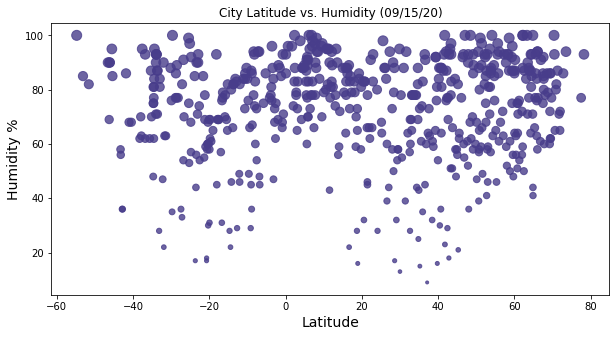

In [62]:
x_values = cities_data['Lat']
y_values = cities_data['Humidity']
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity %', fontsize=14)
plt.title("City Latitude vs. Humidity (09/15/20)")
plt.savefig("output_data/City Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

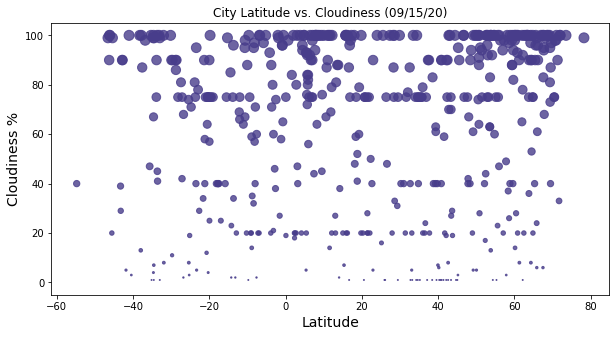

In [63]:
x_values = cities_data['Lat']
y_values = cities_data['Cloudiness']
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness %', fontsize=14)
plt.title("City Latitude vs. Cloudiness (09/15/20)")
plt.savefig("output_data/City Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

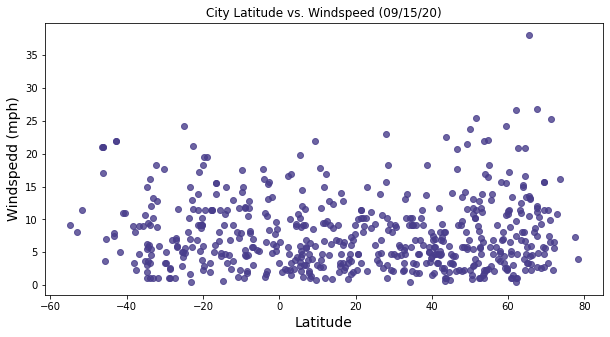

In [66]:
x_values = cities_data['Lat']
y_values = cities_data['Windspeed']
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Windspedd (mph)', fontsize=14)
plt.title("City Latitude vs. Windspeed (09/15/20)")
plt.savefig("output_data/City Latitude vs Windspeed.png")

plt.show()

## Linear Regression

In [67]:
northern_hemisphere = cities_data.loc[cities_data["Lat"] >= 0]
southern_hemisphere = cities_data.loc[cities_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

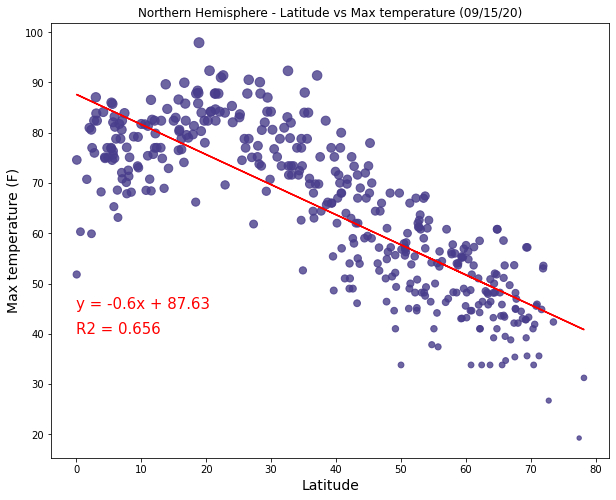

In [81]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (0, 45), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (0,40), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max temperature (F)', fontsize=14)
plt.title("Northern Hemisphere - Latitude vs Max temperature (09/15/20)")
plt.savefig("output_data/Northern Hemisphere - Latitude vs Max temperature.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

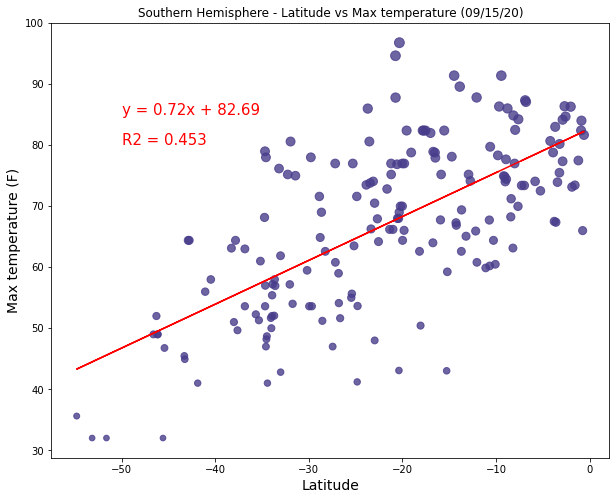

In [82]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (-50, 85), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50,80), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max temperature (F)', fontsize=14)

plt.title("Southern Hemisphere - Latitude vs Max temperature (09/15/20)")
plt.savefig("output_data/Southern Hemisphere - Latitude vs Max temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

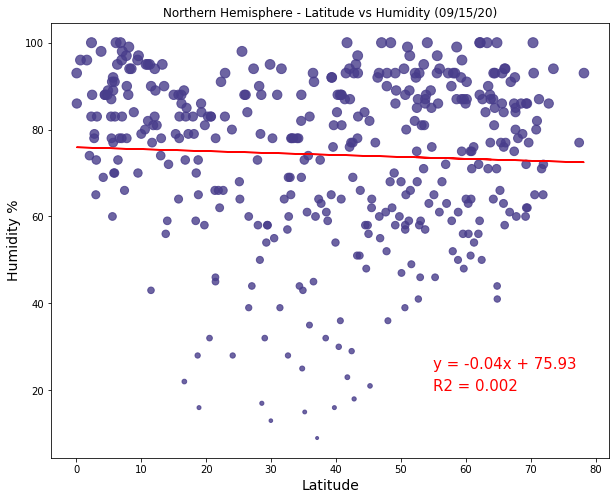

In [86]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (55,25), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (55,20), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity %', fontsize=14)

plt.title("Northern Hemisphere - Latitude vs Humidity (09/15/20)")
plt.savefig("output_data/Northern Hemisphere - Latitude vs Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

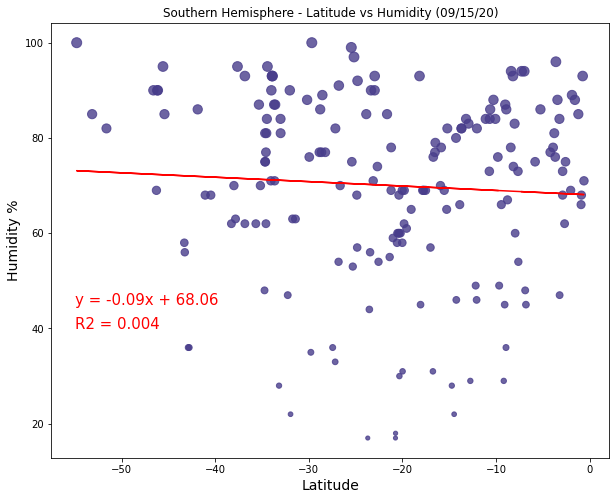

In [90]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (-55,45), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-55,40), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity %', fontsize=14)

plt.title("Southern Hemisphere - Latitude vs Humidity (09/15/20)")
plt.savefig("output_data/Southern Hemisphere - Latitude vs Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

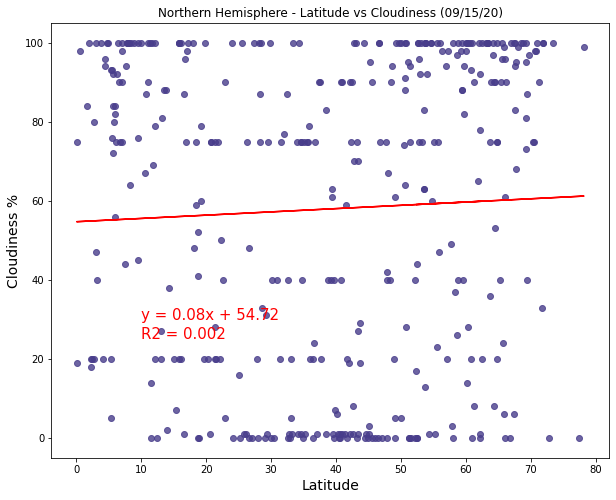

In [94]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8,)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (10,30), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (10,25), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness %', fontsize=14)

plt.title("Northern Hemisphere - Latitude vs Cloudiness (09/15/20)")
plt.savefig("output_data/Northern Hemisphere - Latitude vs Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

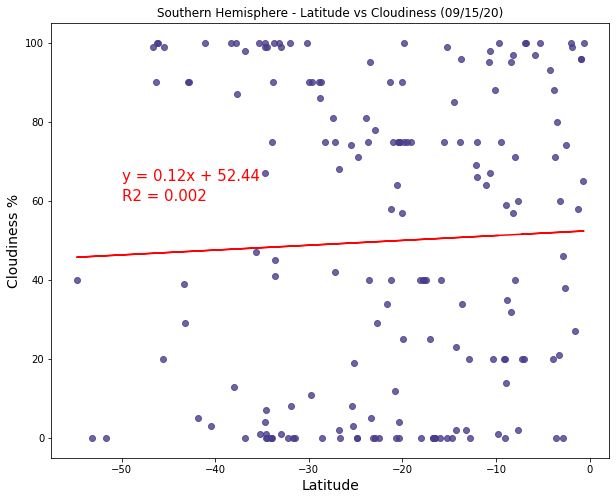

In [104]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8,)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (-50,65), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-50,60), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness %', fontsize=14)

plt.title("Southern Hemisphere - Latitude vs Cloudiness (09/15/20)")
plt.savefig("output_data/Southern Hemisphere - Latitude vs Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

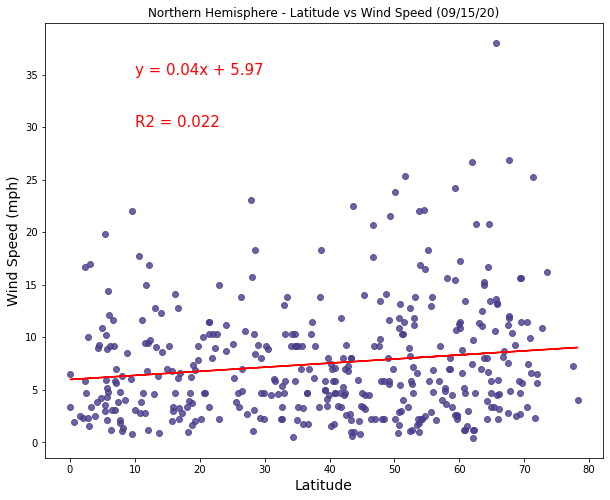

In [109]:
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Windspeed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (10,35), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (10,30), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)

plt.title("Northern Hemisphere - Latitude vs Wind Speed (09/15/20)")
plt.savefig("output_data/Northern Hemisphere - Latitude vs Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

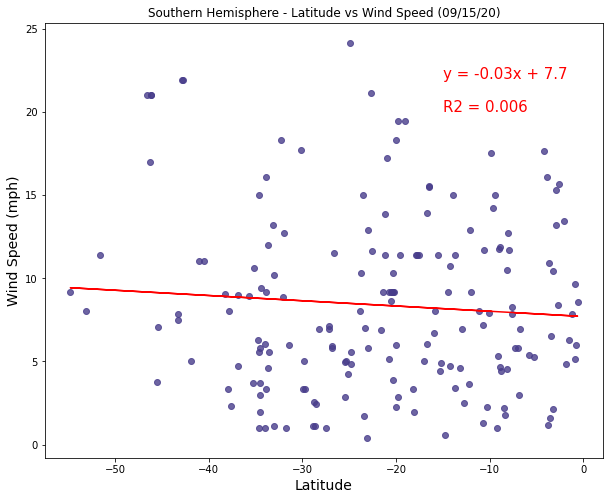

In [110]:
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Windspeed']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (-15,22), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (-15,20), fontsize=15, color="red")


plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)

plt.title("Southern Hemisphere - Latitude vs Wind Speed (09/15/20)")
plt.savefig("output_data/Southern Hemisphere - Latitude vs Wind Speed.png")